### Introduction:
Credit risk refers to the possibility of loss that a lender or investor may face due to the failure of a borrower to repay a loan or fulfill other financial obligations. It is the risk of default on a debt that may arise from a borrower's inability or unwillingness to pay back the money borrowed.

Credit risk is a major concern for banks, financial institutions, and investors who lend money or invest in securities, as it can lead to a reduction in the value of their investments or even to a loss of principal. To manage credit risk, lenders and investors often use credit scoring models, perform due diligence on borrowers, and set credit limits and collateral requirements.

Machine Learning models have been helping these companies to improve the accuracy of their credit risk analysis, providing a scientific method to identify potential debtors in advance.

### Introduction About the Data :

**The dataset** The goal is to predict `defaulter` of given credit card customers.

There are 25 independent variables (including `id`):

* `ID`: ID of each client
* `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* `SEX`: Gender (1=male, 2=female)
* `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
* `AGE`: Age in years
* `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay 
* `for` eight months, 9=payment delay for nine months and above)
* `PAY_2`: Repayment status in August, 2005 (scale same as above)
* `PAY_3`: Repayment status in July, 2005 (scale same as above)
* `PAY_4`: Repayment status in June, 2005 (scale same as above)
* `PAY_5`: Repayment status in May, 2005 (scale same as above)
* `PAY_6`: Repayment status in April, 2005 (scale same as above)
* `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
* `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
* `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
* `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
* `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
* `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
* `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
* `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
* `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
* `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
* `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
* `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
Target variable:
* `default`: default.payment.next.month: Default payment (1=yes, 0=no).

Dataset Source Link :
[https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)

In [23]:
df = pd.read_csv('UCI_Credit_Card.csv')


In [24]:
df.shape

(30000, 25)

In [25]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### FINDING NULL VALUE AND DUPLICATES

In [27]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [28]:
df.duplicated().sum()

0

RESULT:
1. No null value present
2. No duplicate value present

In [29]:
df['default'] = df['default.payment.next.month']
df = df.drop(labels=["ID","default.payment.next.month"],axis=1)

In [30]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [31]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [32]:
df['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [33]:
df['PAY_PENDING'] = df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
bill_amt = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
pay_amt = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
df['AMT_PENDING'] = bill_amt - pay_amt

In [34]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,PAY_PENDING,AMT_PENDING
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,7015.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,12077.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,90635.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,222946.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,50290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,682799.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-4,6692.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,8,39196.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,-1,119430.0


In [35]:
cat = ['SEX','EDUCATION','MARRIAGE']

In [36]:
for i in cat:
    print("*******************************************************************")
    print(f"{i}:{df[i].value_counts(normalize = True)*100}")
    print("*******************************************************************")
    

*******************************************************************
SEX:SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64
*******************************************************************
*******************************************************************
EDUCATION:EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: proportion, dtype: float64
*******************************************************************
*******************************************************************
MARRIAGE:MARRIAGE
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: proportion, dtype: float64
*******************************************************************


*+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+*


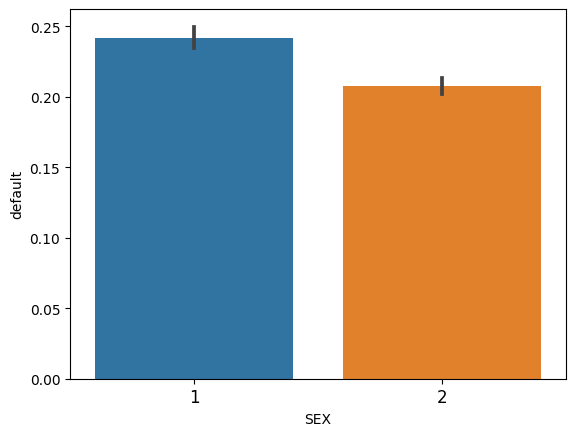

*+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+*


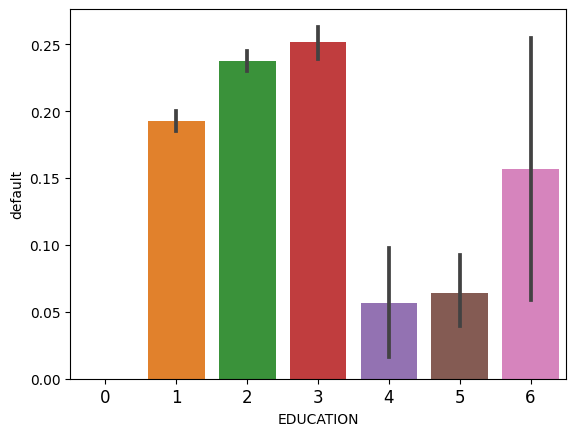

*+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+**+*


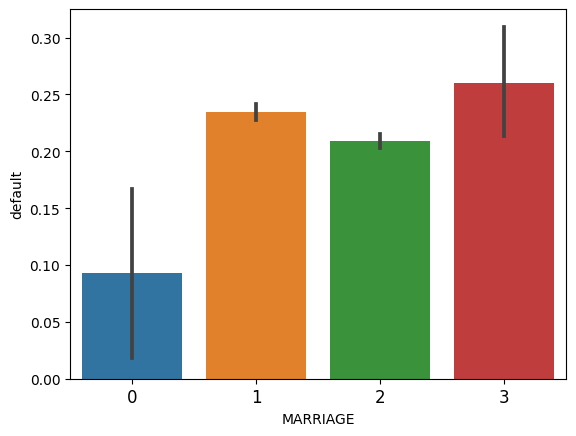

In [37]:
for i in cat:
    sns.barplot(df,x=i,y=df['default'])
    plt.xticks(size=12)
    print("*+*"*100)
    plt.show()

#### Result

* Males are slightly more defaulter as compare to females.
* Students of High school > university > Graduate in defaulter.



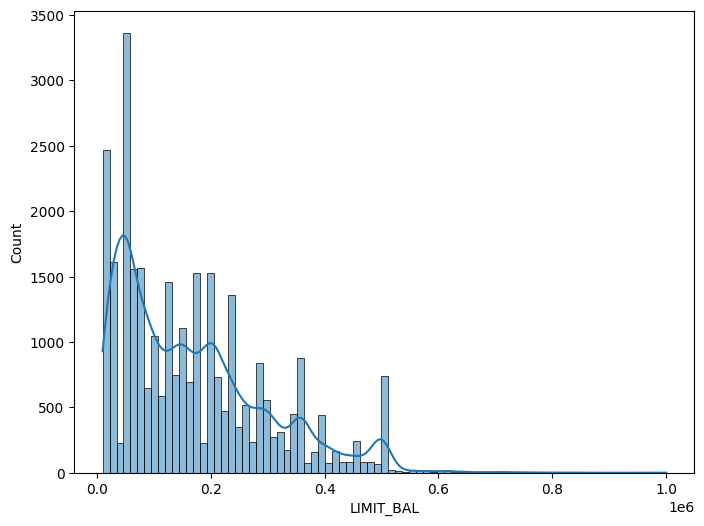

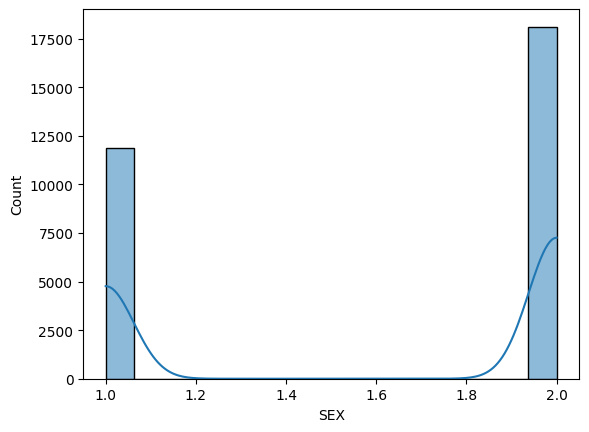

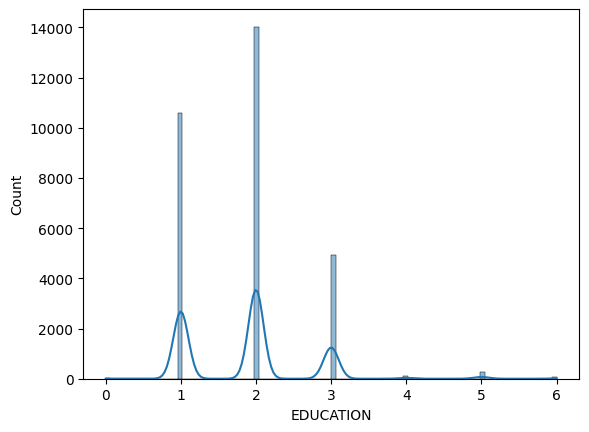

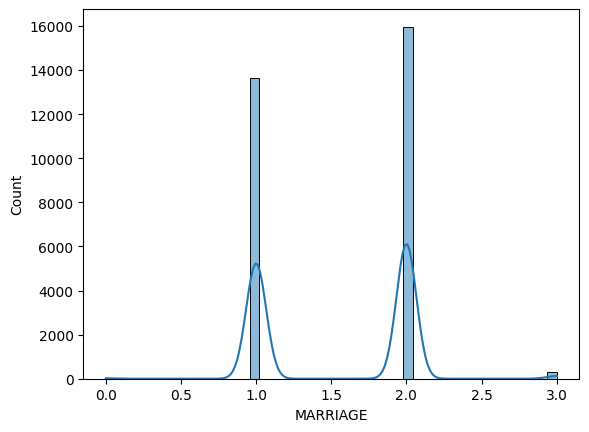

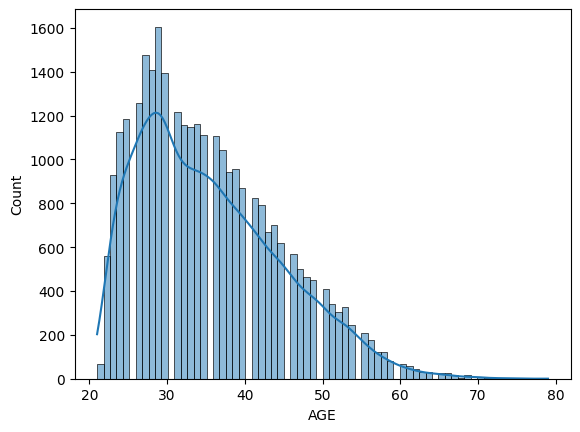

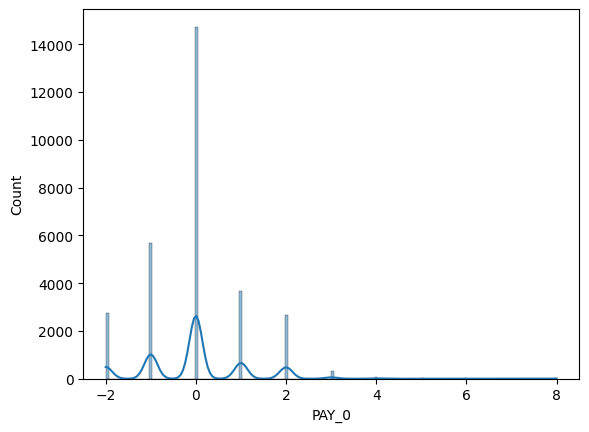

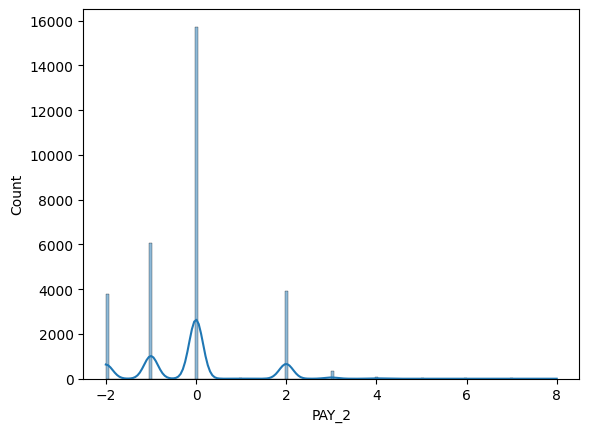

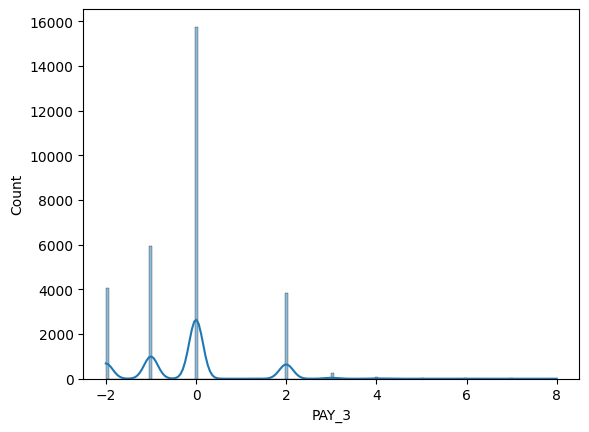

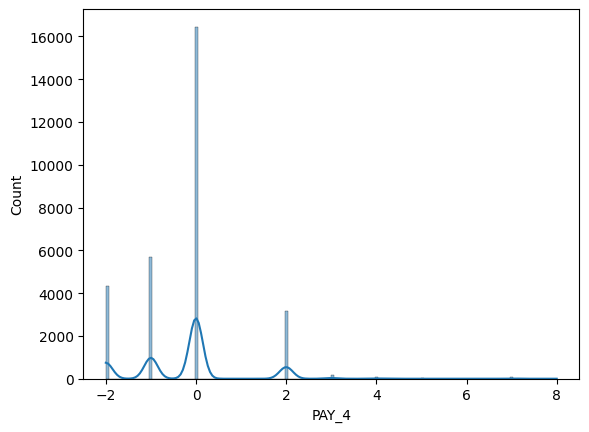

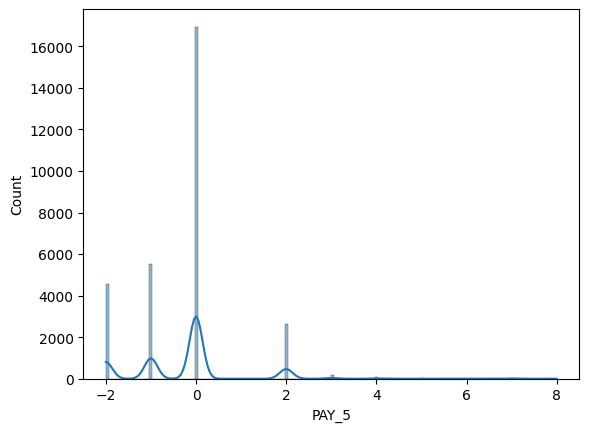

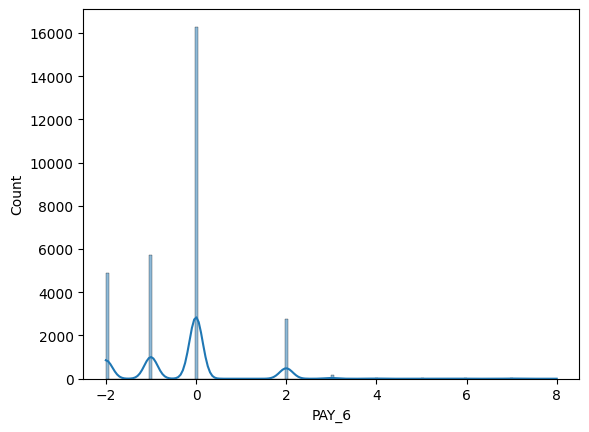

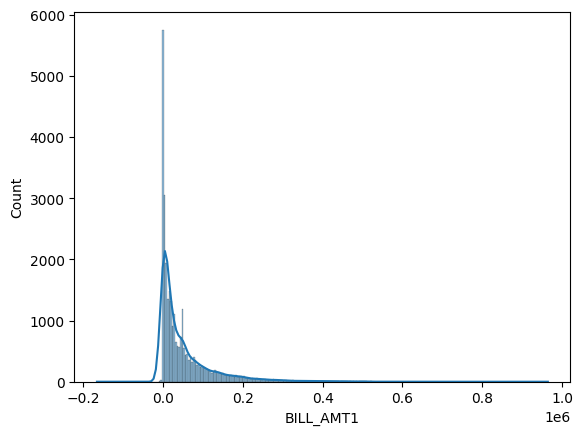

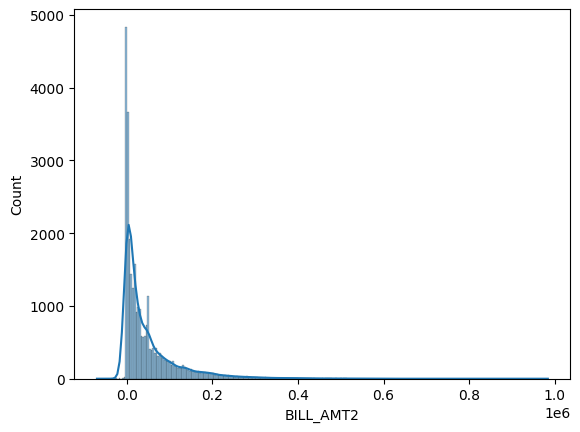

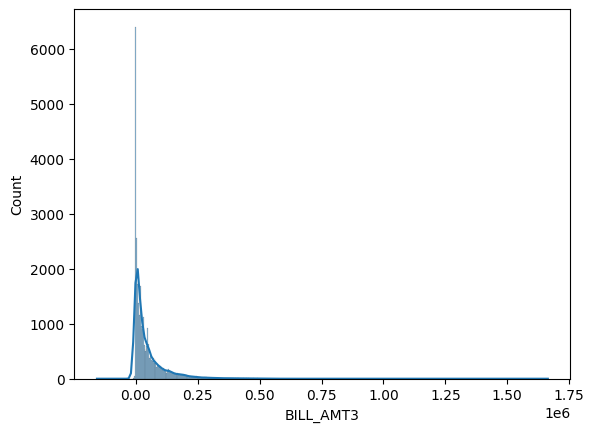

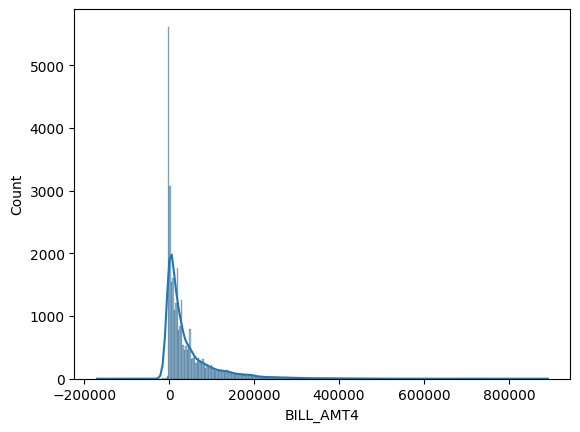

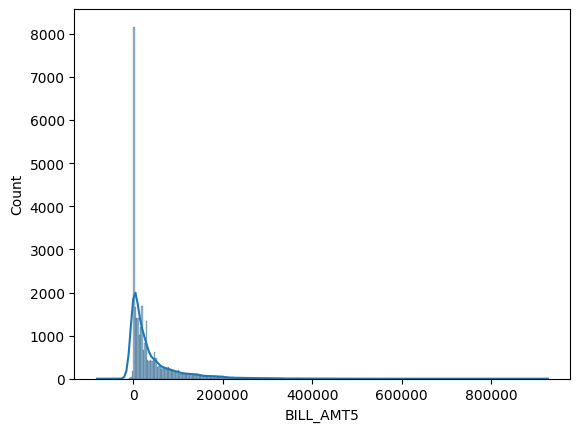

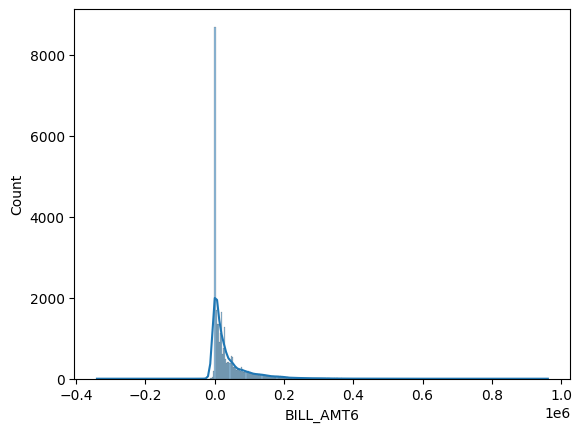

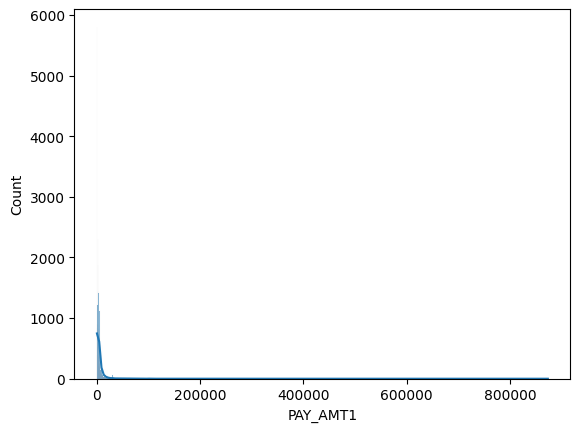

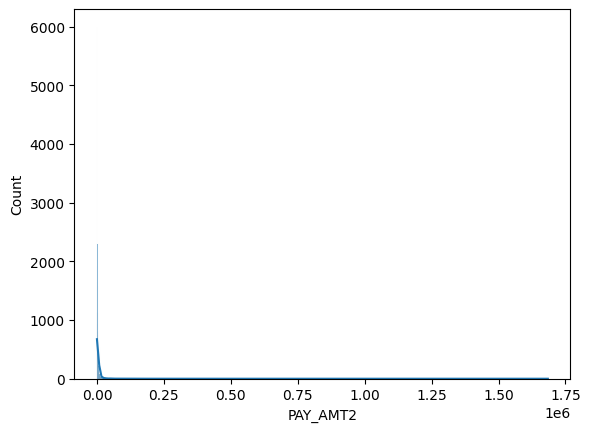

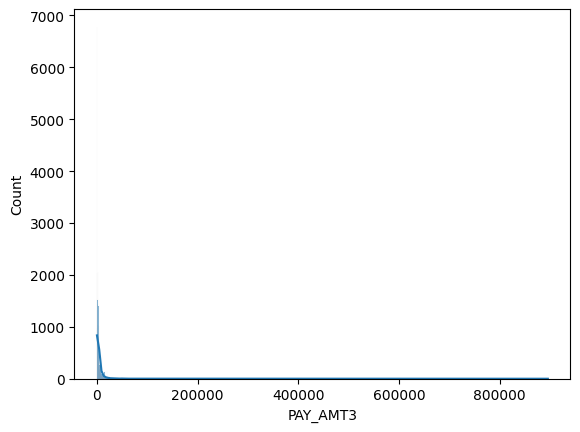

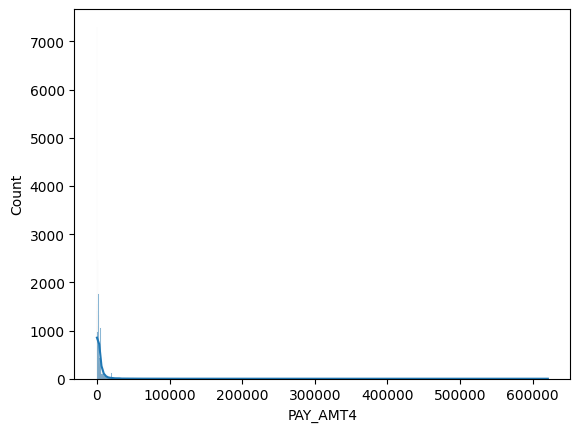

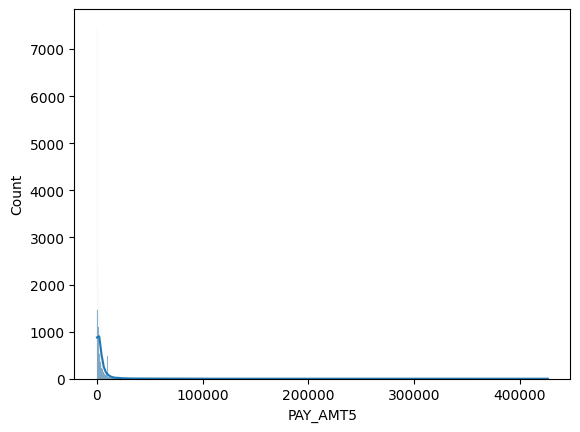

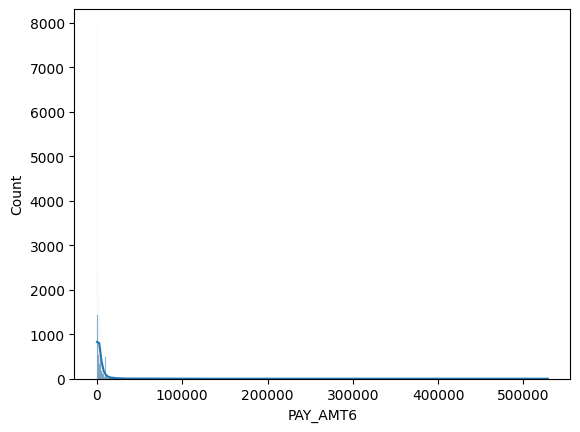

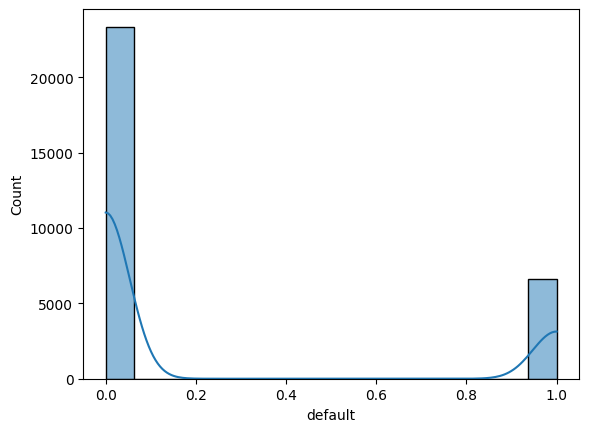

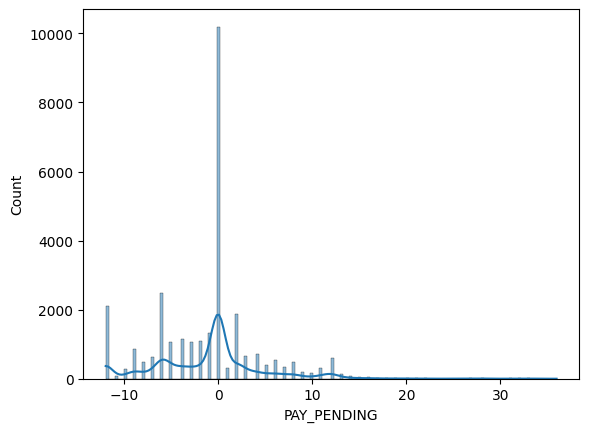

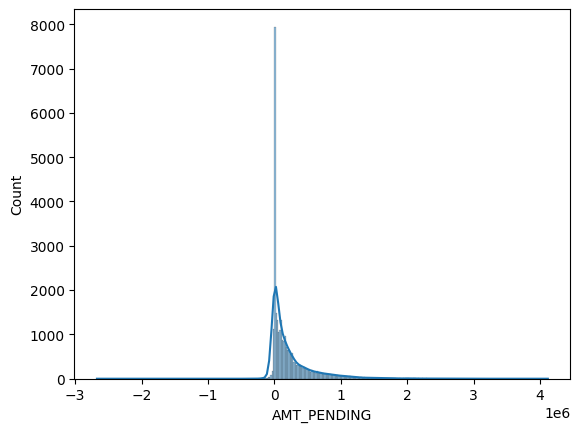

In [38]:
plt.figure(figsize=(8,6))
x=0
for i in df:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

## Correlation


In [39]:
corr = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_PENDING','AMT_PENDING','default']
df1 = df[corr]

<Axes: >

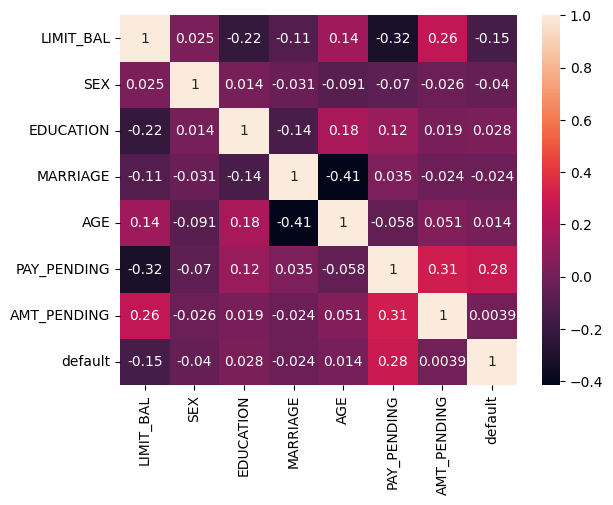

In [40]:
sns.heatmap(df1.corr(),annot=True)

In [42]:
df1['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64